In [443]:
#Import some libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization,SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense,GRU, Conv1D, Flatten,LSTM, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv2D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from keras.layers.embeddings import Embedding
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer


In [444]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [445]:
#Loading data set
df = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")

In [446]:
#dimensions of dataset
#There are 145460 rows and 23 columns
df.shape

(145460, 23)

In [447]:
#Preview dataset
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [448]:
#remove date predictor in dataset
df.drop("Date", axis = 1, inplace = True)

In [449]:
#preview dataset while dropping date
df.shape

(145460, 22)

In [450]:
#Checking the columns in dataset
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [451]:
df.RainToday.value_counts()


No     110319
Yes     31880
Name: RainToday, dtype: int64

In [452]:
df.RainTomorrow.value_counts()


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [453]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [454]:
#Checking null value count in data
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [455]:
#Dropping the null values in dependent variable
#Use df1 veriable for train data
df1 = df[df['RainTomorrow'].notna()]   #This is our training data
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [456]:
#Dimension of dataset while dropping null values
df1.shape

(142193, 22)

In [457]:
#info of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [458]:
# find categorical variables

categorical = [var for var in df1.columns if df1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [459]:
#Display categorical variables
df1[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [460]:
# find numerical variables

numerical = [var for var in df1.columns if df1[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [461]:
#Display nemerical variables
df1[numerical].head()     #Missing values in numerical variables

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [462]:
#checking null values in dataframe
df1.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [463]:
#replacing null values in categorical variables with mode value
df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0], inplace=True)
df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0], inplace=True)
df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0], inplace=True)
df1['RainToday'].fillna(df1['RainToday'].mode()[0], inplace=True)
df1['RainTomorrow'].fillna(df1['RainTomorrow'].mode()[0], inplace=True)

In [464]:
#Count of null values in dataset
df1.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

In [465]:
# view the categorical variables

df1[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [466]:
df1.RainTomorrow.value_counts()


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [467]:
ll=pd.isnull(df["RainTomorrow"])
ll

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459     True
Name: RainTomorrow, Length: 145460, dtype: bool

In [468]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df1['Location']= label_encoder.fit_transform(df1['Location'])
df1['WindGustDir']= label_encoder.fit_transform(df1['WindGustDir'])
df1['WindDir9am']= label_encoder.fit_transform(df1['WindDir9am'])
df1['WindDir3pm']= label_encoder.fit_transform(df1['WindDir3pm'])
df1['RainToday']= label_encoder.fit_transform(df1['RainToday'])
df1['RainTomorrow']= label_encoder.fit_transform(df1['RainTomorrow'])
 

In [469]:
#Display data variables
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,NaN,NaN,0,31.0,2,0,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0,0
145455,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0


In [470]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [471]:
#There is not null record in our data
df1.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

In [472]:
#filling the null values in numerical variable with median
df1 = df1.fillna(df1.median())

In [473]:
#Create new dataset and find null valuesdf2,isna().sum()
df2 = df[~df['RainTomorrow'].notna()]
df2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


In [474]:
df.RainTomorrow.value_counts()


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [475]:
df2.isna().sum()

Location            0
MinTemp           848
MaxTemp           939
Rainfall         1855
Evaporation      1947
Sunshine         2019
WindGustDir       996
WindGustSpeed     993
WindDir9am        553
WindDir3pm        450
WindSpeed9am      419
WindSpeed3pm      432
Humidity9am       880
Humidity3pm       897
Pressure9am      1051
Pressure3pm      1047
Cloud9am         2231
Cloud3pm         2264
Temp9am           863
Temp3pm           883
RainToday        1855
RainTomorrow     3267
dtype: int64

In [476]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df2['Location']= label_encoder.fit_transform(df2['Location'])
df2['WindGustDir']= label_encoder.fit_transform(df2['WindGustDir'])
df2['WindDir9am']= label_encoder.fit_transform(df2['WindDir9am'])
df2['WindDir3pm']= label_encoder.fit_transform(df2['WindDir3pm'])
df2['RainToday']= label_encoder.fit_transform(df2['RainToday'])
df2['RainTomorrow']= label_encoder.fit_transform(df2['RainTomorrow'])


In [477]:
#filling the null values in numerical variable
df2['MinTemp'] = df2['MinTemp'].fillna(df2['MinTemp'].median())
df2['MaxTemp'] = df2['MaxTemp'].fillna(df2['MaxTemp'].median())
df2['Rainfall'] = df2['Rainfall'].fillna(df2['Rainfall'].median())
df2['Evaporation'] = df2['Evaporation'].fillna(df2['Evaporation'].median())
df2['Sunshine'] = df2['Sunshine'].fillna(df2['Sunshine'].median())
df2['WindGustSpeed'] = df2['WindGustSpeed'].fillna(df2['WindGustSpeed'].median())
df2['WindSpeed9am'] = df2['WindSpeed9am'].fillna(df2['WindSpeed9am'].median())
df2['WindSpeed3pm'] = df2['WindSpeed3pm'].fillna(df2['WindSpeed3pm'].median())
df2['Humidity9am'] = df2['Humidity9am'].fillna(df2['Humidity9am'].median())
df2['Humidity3pm'] = df2['Humidity3pm'].fillna(df2['Humidity3pm'].median())
df2['Pressure9am'] = df2['Pressure9am'].fillna(df2['Pressure9am'].median())
df2['Pressure3pm'] = df2['Pressure3pm'].fillna(df2['Pressure3pm'].median())
df2['Cloud9am'] = df2['Cloud9am'].fillna(df2['Cloud9am'].median())
df2['Cloud3pm'] = df2['Cloud3pm'].fillna(df2['Cloud3pm'].median())
df2['Temp9am'] = df2['Temp9am'].fillna(df2['Temp9am'].median())
df2['Temp3pm'] = df2['Temp3pm'].fillna(df2['Temp3pm'].median())

In [478]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 14 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       3267 non-null   int64  
 1   MinTemp        3267 non-null   float64
 2   MaxTemp        3267 non-null   float64
 3   Rainfall       3267 non-null   float64
 4   Evaporation    3267 non-null   float64
 5   Sunshine       3267 non-null   float64
 6   WindGustDir    3267 non-null   int64  
 7   WindGustSpeed  3267 non-null   float64
 8   WindDir9am     3267 non-null   int64  
 9   WindDir3pm     3267 non-null   int64  
 10  WindSpeed9am   3267 non-null   float64
 11  WindSpeed3pm   3267 non-null   float64
 12  Humidity9am    3267 non-null   float64
 13  Humidity3pm    3267 non-null   float64
 14  Pressure9am    3267 non-null   float64
 15  Pressure3pm    3267 non-null   float64
 16  Cloud9am       3267 non-null   float64
 17  Cloud3pm       3267 non-null   float64
 18  Temp9

In [479]:
from sklearn.utils.validation import indexable
X_train = df1.drop(['RainTomorrow'], axis=1)
y_train = df1['RainTomorrow']

print(X_train.shape)
print(y_train.shape)

(142193, 21)
(142193,)


In [480]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,4.8,8.5,0,31.0,2,0,...,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0
145455,41,2.8,23.4,0.0,4.8,8.5,0,31.0,9,1,...,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0
145456,41,3.6,25.3,0.0,4.8,8.5,6,22.0,9,3,...,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0
145457,41,5.4,26.9,0.0,4.8,8.5,3,37.0,9,14,...,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0


In [481]:
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [482]:
print(y_train.isna().sum())
X_train.isna().sum()

0


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [483]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [484]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 142193, dtype: int64

In [485]:
df1.RainTomorrow.value_counts()


0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [486]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [487]:
x=X_train
y=y_train

In [488]:
y=np.array(y, dtype=np.int64)
x=np.array(x, dtype=np.int64)

In [489]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [490]:
counter = Counter(y)
print(counter)

Counter({0: 110316, 1: 110316})


In [491]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=42)


In [492]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [493]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(113754, 21, 1)

In [494]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(28439, 21, 1)

In [495]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [496]:
    model = Sequential()
    model.add(Conv1D(128, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
#nn.add(MaxPooling1D(pool_size=(2)))
#cnn.add(Flatten())
#model = Sequential()
#model.add(TimeDistributed(cnn, ...))
   # model.add(Dropout(0.2))

    model.add(LSTM(64,input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
#    model.add(BatchNormalization())

# Third LSTM layer
   #model.add(Dense(10))
    model.add(BatchNormalization())

    model.add(Dropout(0.2))
   # model.add(BatchNormalization())
    model.add(Dense(16))
    model.add(Dropout(0.2))



    model.add(Dense(units= 1,activation='sigmoid' ))

    #model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])


In [497]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#model= model.compile(loss="binary_crossentropy", metrics=['accuracy'])
#model = KerasClassifier(create_model, verbose=0, )


In [498]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')


In [499]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=200,
                    callbacks=[early],
validation_split=0.2)


Epoch 1/100
456/456 [==============================] - 6s 7ms/step - loss: 0.4709 - accuracy: 0.7936 - val_loss: 0.4779 - val_accuracy: 0.7788
Epoch 2/100
456/456 [==============================] - 3s 7ms/step - loss: 0.4222 - accuracy: 0.8209 - val_loss: 0.4266 - val_accuracy: 0.8209
Epoch 3/100
456/456 [==============================] - 3s 7ms/step - loss: 0.4054 - accuracy: 0.8280 - val_loss: 0.3913 - val_accuracy: 0.8322
Epoch 4/100
456/456 [==============================] - 4s 8ms/step - loss: 0.3820 - accuracy: 0.8370 - val_loss: 0.3790 - val_accuracy: 0.8348
Epoch 5/100
456/456 [==============================] - 3s 7ms/step - loss: 0.3752 - accuracy: 0.8389 - val_loss: 0.3923 - val_accuracy: 0.8329
Epoch 6/100
456/456 [==============================] - 3s 7ms/step - loss: 0.3716 - accuracy: 0.8394 - val_loss: 0.3688 - val_accuracy: 0.8406
Epoch 7/100
456/456 [==============================] - 3s 7ms/step - loss: 0.3688 - accuracy: 0.8416 - val_loss: 0.3695 - val_accuracy: 0.8382

Text(0, 0.5, 'Loss')

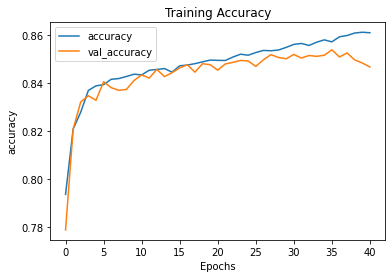

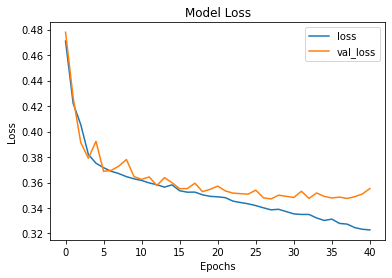

In [500]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [501]:
df2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2,8.4,24.6,0.0,4.4,7.0,16,41.0,8,14,...,57.0,32.0,1009.7,1008.7,7.0,6.0,15.9,23.5,0,0
283,2,2.6,22.4,0.0,4.4,7.0,16,41.0,0,14,...,71.0,55.0,1017.8,1017.6,7.0,6.0,9.7,14.3,0,0
435,2,22.1,35.1,0.0,4.4,7.0,16,41.0,1,12,...,58.0,37.0,1020.9,1017.8,7.0,1.0,26.9,33.5,0,0
437,2,21.5,35.0,0.0,4.4,7.0,16,41.0,10,0,...,76.0,35.0,1015.8,1010.3,7.0,8.0,24.2,33.1,0,0
443,2,15.5,30.6,0.0,4.4,7.0,16,41.0,9,11,...,66.0,30.0,1015.9,1013.8,7.0,6.0,19.4,30.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,38,22.5,37.7,0.0,4.4,7.0,9,50.0,9,2,...,22.0,11.0,1012.6,1009.6,7.0,6.0,28.8,37.2,0,0
145091,38,12.3,19.1,0.0,4.4,7.0,16,41.0,16,16,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,0,0
145092,38,14.2,18.7,0.0,4.4,7.0,16,41.0,13,16,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,2,0
145335,38,13.5,22.4,0.0,4.4,7.0,16,41.0,1,12,...,23.0,11.0,1013.7,1008.4,7.0,6.0,25.2,34.4,0,0
